In [3]:
import torch
import fastai
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm import tqdm
from fastai.vision.all import *
from fastai.vision.augment import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
ls

coco2017labels-segments.zip  coco8/  data/  fastai-v3/  imagenet-mini/


In [2]:
pip install fastai

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 KB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 KB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 KB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 KB 5.9 MB/s eta 0:00:00a 

In [ ]:
#created dataset in colab

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/MEMES/'
from fastai.vision import *
path = Path(base_dir)
path.mkdir(parents=True, exist_ok=True)

In [ ]:
#1000 memes

folder = 'meme'
jsonl_file_path = "facebook-hateful-meme-dataset/data/train.jsonl"
path = Path(base_dir)
destination_dir = path/folder

image_count = 0

with open(jsonl_file_path, 'r') as f:
    for line in f:
        entry = json.loads(line)

        image_url = entry["img"]
        print(image_url)

        source_file_path = Path(jsonl_file_path).parent / image_url
        print(source_file_path)
        filename = image_url.split("/")[-1]
        destination_file_path = destination_dir
        print(destination_file_path)
        shutil.copy(str(source_file_path), str(destination_file_path))

        image_count += 1

        if image_count == 1000:
            break


In [ ]:
import os
import shutil

#used a mini ImageNet dataset from Kaggle for not_memes

source_dir = 'imagenetmini-1000/imagenet-mini/train/'

destination_dir = 'gdrive/MyDrive/fastai-v3/data/MEMES/not_meme'

stop = 0
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)

    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

        if len(images) > 0:
            selected_image = images[0]

            source_file_path = os.path.join(folder_path, selected_image)
            destination_file_path = os.path.join(destination_dir, selected_image)

            shutil.copy(source_file_path, destination_file_path)

            print(f"Moved {selected_image} from {folder_name} to destination folder.")

    if stop == 1:
      break


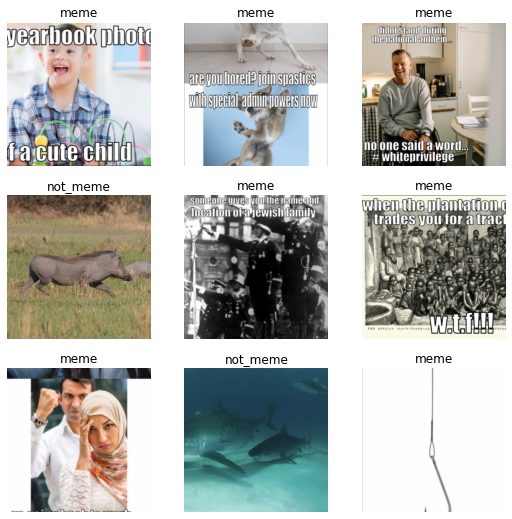

In [8]:
img_size = 460

#augment the images for better training

augmentations = [
    Brightness(max_lighting=0.3, p=0.5),
    Contrast(max_lighting=0.4, p=0.5),
    RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1)]
    
data = ImageDataLoaders.from_folder(path='fastai-v3/data/MEMES',
                               valid_pct = 0.2,
                               num_workers=0,
                               batch_tfms=augmentations,
                               item_tfms=Resize(img_size))
data.show_batch()

In [9]:
learn = vision_learner(data,
                    resnet34,
                    metrics=[accuracy,error_rate])

#it actually just crashed

learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/aadi/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:14<00:00, 5.93MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time


: 

: 

In [ ]:
#find the optimal learning rate
val = learn.lr_find()

learn.unfreeze()

In [ ]:
#lr_find() gives a plot, choose slice that has max loss slope

learn.fit_one_cycle(2, slice(3e-4,3e-3))